# All Types of Argo/EM-APEX Trajectory Graphs (Built-In + My Own Flare)

In [1]:
#All the imports I utalized to allow any code to run across any of my notebooks
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
import pandas as pd
from pathlib import Path
import seawater as sw

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True)

from argopy import IndexFetcher as ArgoIndexFetcher

## Don't forget to alter this code a little bit so that you are accessing the proper EM-APEX Data 

For this notebook I used the EM-APEX data that included all GPS data from all three experiments from the google drive; the file was titled "gps_points_allexperiments.parquet" when I downloaded it, so make sure to change the path to your own directory!!

In [2]:
EM_APEX_GPS = r"C:\Users\lily\Documents\ElizabethFiles2023\DINO SIP Documents\gps_points_allexperiments.parquet" #MAKE SURE TO CHANGE THIS TO WHERE THE FILE IS LOCATED IN YOUR OWN DIRECTORY!

EM_APEX_GPSdata_df = pd.read_parquet(EM_APEX_GPS) #This is reading the EM-APEX file through the Python package, pandas.

EM_SMILEGPS_df = EM_APEX_GPSdata_df.loc[EM_APEX_GPSdata_df["experiment"] == 'SMILE'] #This is limiting what is being read to all data whose value in the coloumn "experiment" is "SMILE" meaning I am ignoring Niskine and DIMES data.

#This was manually splitting up the data to my three regions in Smile (Region 1 = Section 1, Region 2 = Section 2, Region 3 = Section 3)
Section_1 = ["4968s1", "4970s1", "6669s1", "6677s1", "6680s1", "7493s1", "7495s1", "7805s1", "7805s1a", "7806s1"]

Section_2 = ["4392s2", "4968s2", "4970s2", "6668s2", "6669s2", "6670s2", "6677s2", "6679s2", "6680s2", "7493s2", "7494s2", "7495s2", "7800s2", "7802s2", "7804s2", "7805s2", "7806s2"]

Section_3 = ["4392s3", "4968s3", "4970s3", "6665s3", "6668s3", "6669s3", "6670s3", "6673s3", "6676s3", "6677s3", "6679s3", "7494s3", "7493s3", "7800s3", "7801s3", "7802s3", "7803s3", "7804s3", "7805s3", "7806s3", "7807s3", "7808s3"]

#Finally, this was limiting each seperate dataset to a list of values in the 'deployment' column.
EM_SMILEGPS1_df = EM_APEX_GPSdata_df.loc[EM_APEX_GPSdata_df['deployment'].isin(Section_1)]
EM_SMILEGPS2_df = EM_APEX_GPSdata_df.loc[EM_APEX_GPSdata_df['deployment'].isin(Section_2)]
EM_SMILEGPS3_df = EM_APEX_GPSdata_df.loc[EM_APEX_GPSdata_df['deployment'].isin(Section_3)]

As a reminder, there were a couple different types of built-in trajectory graphs:
- Trajectory on a global map
- Trajectory against a topographical background
- Trajectory color-coded with yearly profiles

I also created my own trajectory graph that included the Argo trajectory mapped against EM-APEX trajectory and the corresponding bounding box regions I chose. This notebook will cover the code I used to create all four of these graphs plotting the nine floats of interest I identified in the AccessingArgoData notebook:

Region #1:
5903608, 5904977

Region #2:
5904128, 4902149

Region #3:
4900816, 4902251

## Trajectory on a Global Map

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

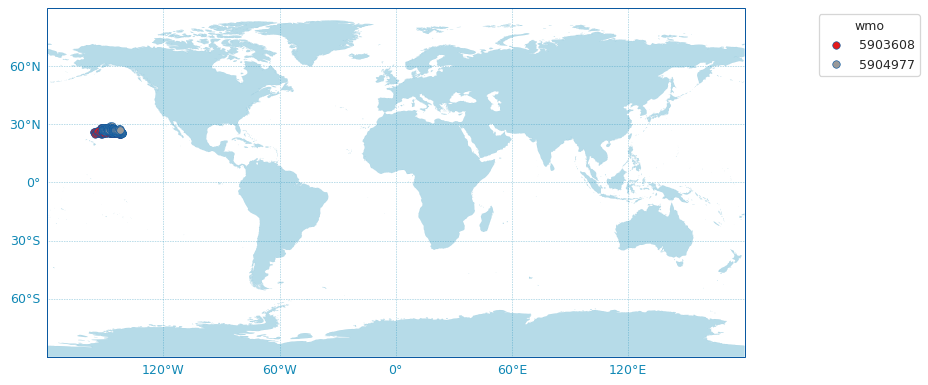

In [3]:
#For Region #1!
apDS = argo_loader.float([5903608, 5904977]).load().data
argo_loader.plot('trajectory', set_global=True)

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

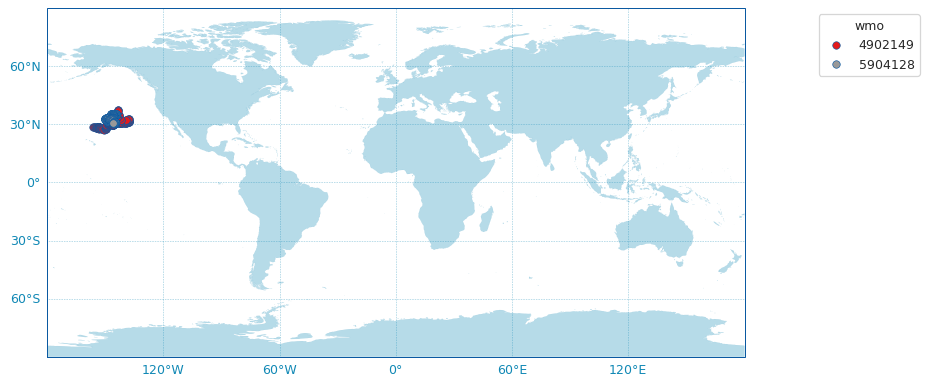

In [4]:
#For Region #2!
apDS = argo_loader.float([5904128, 4902149]).load().data
argo_loader.plot('trajectory', set_global=True)

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

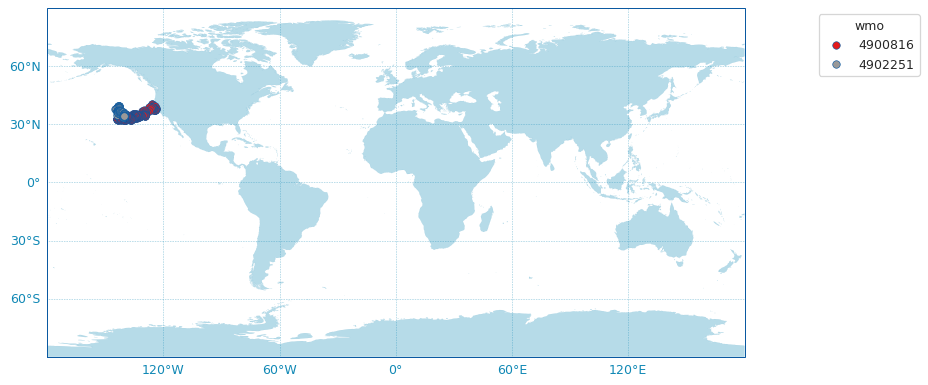

In [5]:
#For Region #3!
apDS = argo_loader.float([4900816, 4902251]).load().data
argo_loader.plot('trajectory', set_global=True)

## Trajectory Against a Topographical Background & w/ Yearly Profiles

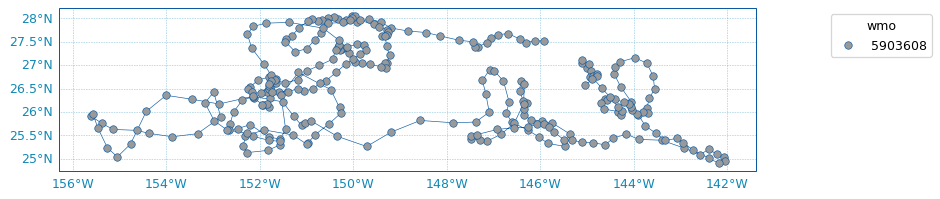

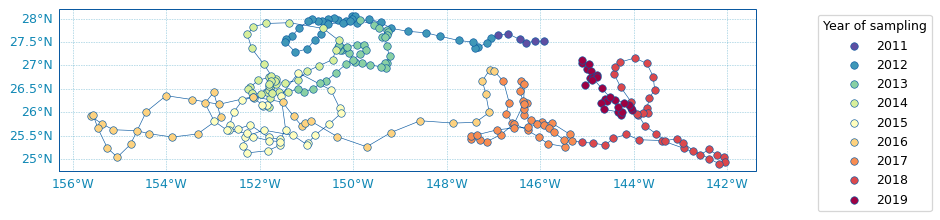

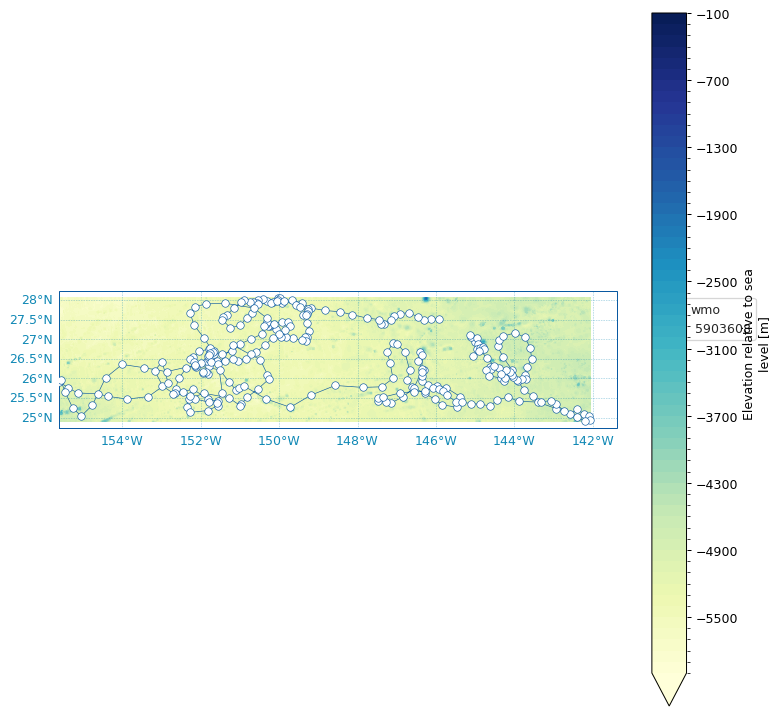

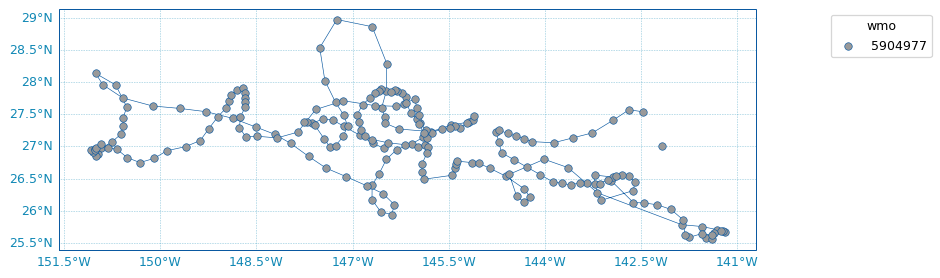

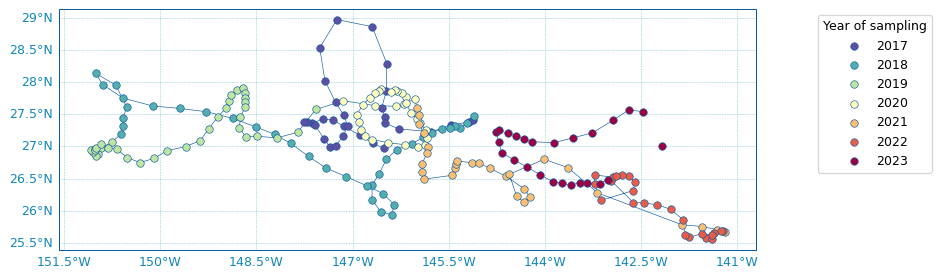

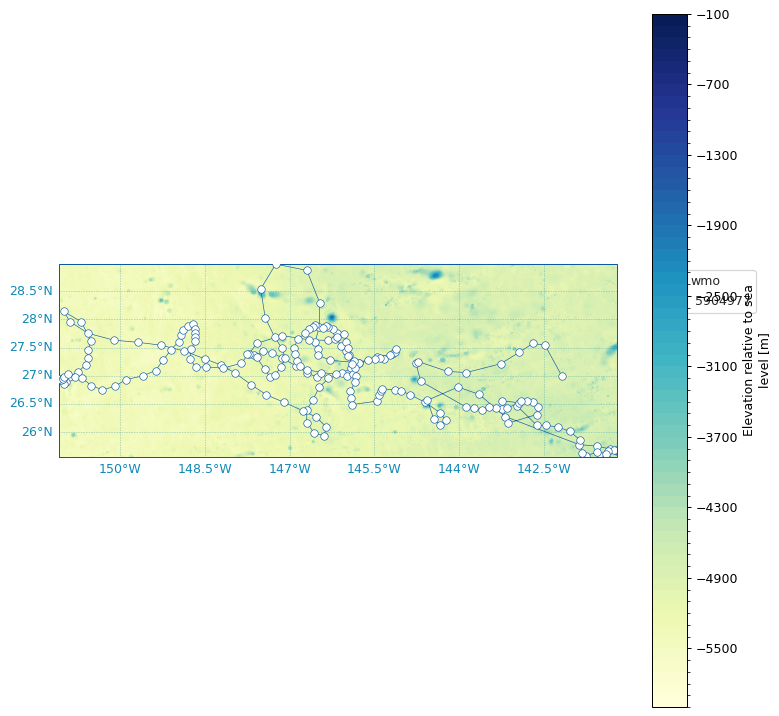

In [6]:
#Region 1

from argopy.plot import scatter_map
from argopy import DataFetcher as ArgoDataFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

for a in [5903608, 5904977]: #The values of a represent Argo float ID numbers or WMO numbers!

    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load() #This loads the float data in a for loop
    ds = ArgoSet.data.argo.point2profile() #This changes the structure of the Argo dataset
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe() 

    #This plots the trajectory and then adds yearly profiles color-coded, which is a built in function in the argopy package
    scatter_map(df)
    ds['year'] = ds['TIME.year'] 
    scatter_map(ds.isel(N_LEVELS=0),
                hue='year',
                cmap='Spectral_r',
                legend_title='Year of sampling')

    fetcher = ArgoDataFetcher().float(a)
    ds = TopoFetcher(fetcher.domain[0:4], cache=True).to_xarray()
    
    argo_loader = ArgoDataFetcher(src='erddap', parallel=True)
    argo_loader.float(a).load()

    #This plots the Argo Trajectory atop a topographical map
    fig, ax = argo_loader.plot('trajectory', figsize=(10, 10), cmap='white')
    ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), ax=ax, add_colorbar=True, cmap='YlGnBu')

In [ ]:
#Region #2

from argopy.plot import scatter_map
from argopy import DataFetcher as ArgoDataFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

for a in [4900816, 4902251]: 
    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    ds = ArgoSet.data.argo.point2profile()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    scatter_map(df)
    ds['year'] = ds['TIME.year'] 
    scatter_map(ds.isel(N_LEVELS=0),
                hue='year',
                cmap='Spectral_r',
                legend_title='Year of sampling')

    fetcher = ArgoDataFetcher().float(a)
    ds = TopoFetcher(fetcher.domain[0:4], cache=True).to_xarray()
    
    argo_loader = ArgoDataFetcher(src='erddap', parallel=True)
    argo_loader.float(a).load()
    
    fig, ax = argo_loader.plot('trajectory', figsize=(10, 10), cmap='white')
    ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), ax=ax, add_colorbar=True, cmap='YlGnBu')

In [ ]:
#Region #3

from argopy.plot import scatter_map
from argopy import DataFetcher as ArgoDataFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

for a in [5904128, 4902149]: 
    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    ds = ArgoSet.data.argo.point2profile()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    scatter_map(df)
    ds['year'] = ds['TIME.year'] 
    scatter_map(ds.isel(N_LEVELS=0),
                hue='year',
                cmap='Spectral_r',
                legend_title='Year of sampling')

    fetcher = ArgoDataFetcher().float(a)
    ds = TopoFetcher(fetcher.domain[0:4], cache=True).to_xarray()
    
    argo_loader = ArgoDataFetcher(src='erddap', parallel=True)
    argo_loader.float(a).load()
    
    fig, ax = argo_loader.plot('trajectory', figsize=(10, 10), cmap='white')
    ds['elevation'].plot.contourf(levels=np.arange(-6000,0,100), ax=ax, add_colorbar=True, cmap='YlGnBu')

#### Dataset Organization Difference: Point2Profile and Original Argo

In [8]:
#Before point2profile...
ArgoSet.data

<xarray.Dataset>
Dimensions:                   (N_POINTS: 212335)
Coordinates:
    LATITUDE                  (N_POINTS) float64 ...
    LONGITUDE                 (N_POINTS) float64 ...
    TIME                      (N_POINTS) datetime64[ns] ...
  * N_POINTS                  (N_POINTS) int64 0 1 2 3 ... 212332 212333 212334
Data variables: (12/23)
    CONFIG_MISSION_NUMBER     (N_POINTS) int32 1 1 1 1 1 ... 240 240 240 240 240
    CYCLE_NUMBER              (N_POINTS) int32 1 1 1 1 1 ... 240 240 240 240 240
    DATA_MODE                 (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION                 (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER           (N_POINTS) int32 5904977 5904977 ... 5904977
    POSITION_QC               (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    ...                        ...
    TEMP_ADJUSTED             (N_POINTS) float32 ...
    TEMP_ADJUSTED_ERROR       (N_POINTS) float32 ...
    TEMP_ADJUSTED_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    TEMP_QC                   (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    TIME_QC                   (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    VERTICAL_SAMPLING_SCHEME  (N_POINTS) <U77 'Primary sampling: averaged [1H...
Attributes: (7)

In [9]:
#After point2profile...
df

,date,latitude,longitude,wmo,cyc
0,2017-02-26 03:07:40,26.9720,-146.5130,5904977,1
1,2017-03-08 06:46:31,27.0520,-146.6880,5904977,2
2,2017-03-18 06:48:09,27.1730,-146.8830,5904977,3
3,2017-03-28 06:48:44,27.3160,-147.1420,5904977,4
4,2017-04-07 06:49:15,27.4120,-147.3070,5904977,5
...,...,...,...,...,...
208,2023-08-04 04:20:03,27.4134,-142.9344,5904977,236
209,2023-08-14 05:21:27,27.5725,-142.6924,5904977,237
210,2023-08-24 04:26:51,27.5416,-142.4742,5904977,238
211,2023-09-03 08:39:04,NaN,NaN,5904977,239


## My Own Trajectory Graphs!

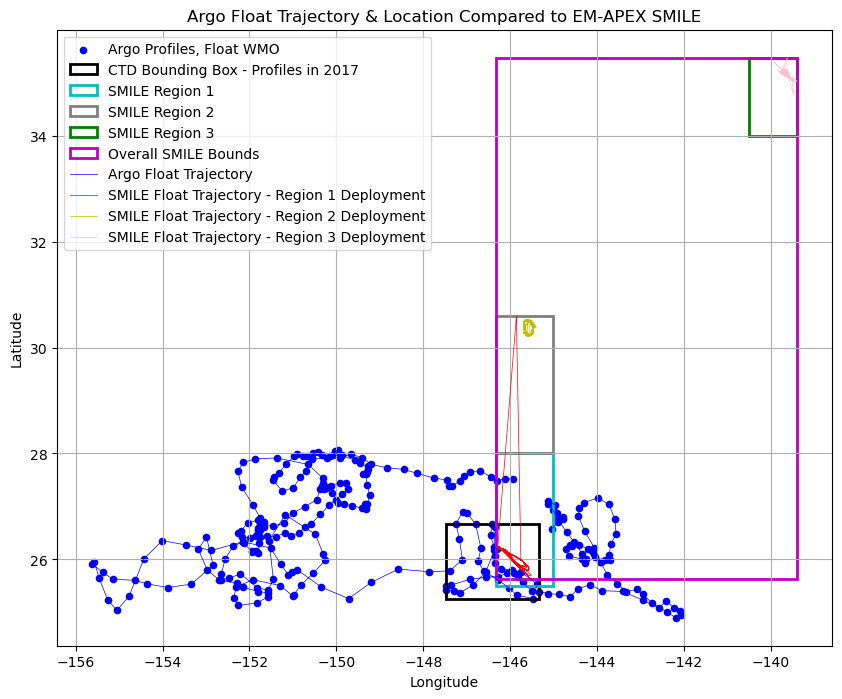

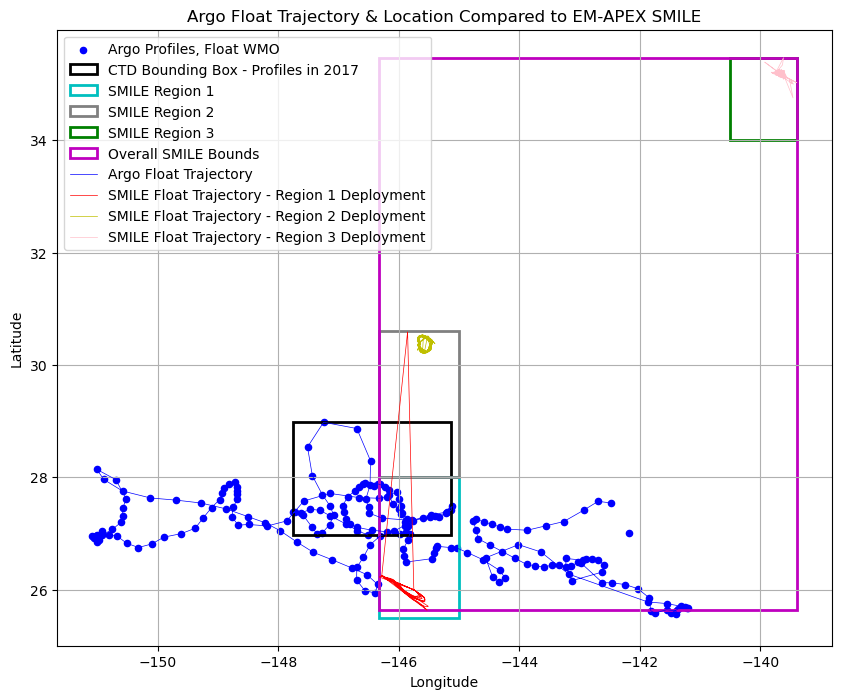

In [12]:
#Region #1

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from argopy import OceanOPSDeployments
from argopy import DataFetcher as ArgoDataFetcher

argo_loader = ArgoDataFetcher(src='erddap', parallel=True) # This limits the data to the highest quality control flag (QC = 1)

sliced_data_dict = {}
a_values = [5903608, 5904977] #These number represent the Argo float ID's that I want to graph!

for a in a_values:

    #This uploads the argo float trajectories
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME") #This adds Time into the index so that we can slice the dataset; before Argo data in the point2profile has two indexes, N_levels and N_Prof (for profiles) that make it difficult to slice otherwise.
    sliced_data = data2.sel(TIME=slice('2017-01-01','2017-12-31')) #This limits the profiles in the Argo float to those in 2017, another way to index Argo data!
    sliced_data_dict[a] = sliced_data

    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot for Argo Floats 0 this is what is mapping each profile of the Argo floats, without the time restriction
    ax.scatter(df.longitude, df.latitude, s=20, c='b', marker='o', label='Argo Profiles, Float WMO')

    # Get the max and min latitudes and longitudes from the CTD bounds of the Argo floats that are in 2017 (i.e. with the time restriction)
    max_lat_1 = sliced_data.LATITUDE.max().values
    min_lat_1 = sliced_data.LATITUDE.min().values
    max_lon_1 = sliced_data.LONGITUDE.max().values
    min_lon_1 = sliced_data.LONGITUDE.min().values

    # Add bounding box to the map
    rect1 = patches.Rectangle((min_lon_1, min_lat_1), max_lon_1 - min_lon_1, max_lat_1 - min_lat_1,
                              linewidth=2, edgecolor='k', facecolor='none', label='CTD Bounding Box - Profiles in 2017')
    ax.add_patch(rect1)

    # Get the max and min latitudes and longitudes from the CTD bounds of Region 1 of EM-APEX SMILE - I manually chose these based on playing around with different values using this same graph.
    max_lat_2 = 28.0
    min_lat_2 = 25.5
    max_lon_2 = -145
    min_lon_2 = -146.322

    rect2 = patches.Rectangle((min_lon_2, min_lat_2), max_lon_2 - min_lon_2, max_lat_2 - min_lat_2,
                              linewidth=2, edgecolor='c', facecolor='none', label='SMILE Region 1')

    # Add another rectangular bounding box
    
    ax.add_patch(rect2)

    # Get the max and min latitudes and longitudes from the CTD bounds for Region 2 of EM-APEX SMILE - Again, I manually chose these.
    max_lat_5 = 30.6
    min_lat_5 = 28.0
    max_lon_5 = -145
    min_lon_5 = -146.322

    rect5 = patches.Rectangle((min_lon_5, min_lat_5), max_lon_5 - min_lon_5, max_lat_5 - min_lat_5,
                              linewidth=2, edgecolor='gray', facecolor='none', label='SMILE Region 2')

    # Add another rectangular bounding box
    
    ax.add_patch(rect5)

    #Get the max and min latitudes and longitudes from my own bounds of Region 3 of EM-APEX SMILE - Again, I manually chose these.
    max_lat_3 = 35.469333
    min_lat_3 = 34.0
    max_lon_3 = -139.39713
    min_lon_3 = -140.5
    
    rect3 = patches.Rectangle((min_lon_3, min_lat_3), max_lon_3 - min_lon_3, max_lat_3 - min_lat_3,
                             linewidth=2, edgecolor='g', facecolor='none', label='SMILE Region 3')

    ax.add_patch(rect3)

    #Get the max and min latitudes and longitudes from Emilio's SMILE bounds!
    max_lat_4 = 35.469333
    min_lat_4 = 25.633673
    max_lon_4 = -139.39713
    min_lon_4 = -146.321753
    
    rect4 = patches.Rectangle((min_lon_4, min_lat_4), max_lon_4 - min_lon_4, max_lat_4 - min_lat_4,
                             linewidth=2, edgecolor='m', facecolor='none', label=("Overall SMILE Bounds"))

    ax.add_patch(rect4)

    #Connect the dots that represent EM-APEX SMILE profiles with a line, because the data is already in timely order, for EM-APEX trajectories. If the data was NOT in timely order we would have to use different code than this!
    ax.plot(df.longitude, df.latitude, c='b', linestyle='-', linewidth=.5, label='Argo Float Trajectory')
    ax.plot(EM_SMILEGPS1_df.LON, EM_SMILEGPS1_df.LAT, c='r', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 1 Deployment')
    ax.plot(EM_SMILEGPS2_df.LON, EM_SMILEGPS2_df.LAT, c='y', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 2 Deployment')
    ax.plot(EM_SMILEGPS3_df.LON, EM_SMILEGPS3_df.LAT, c='pink', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 3 Deployment')

    ax.set_title(f'Argo Float Trajectory & Location Compared to EM-APEX SMILE')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.legend()

    ax.grid()

    plt.show()  # Show the map and bounding box for each 'a' value

    #This code commented out may be useful to you later on; it basically turns our figures into their own seperate image files!
    #fig_filename = f'Trajectory5903608.png'  # Use a unique identifier (e.g., index 'i') in the filename
    #fig.savefig(fig_filename)

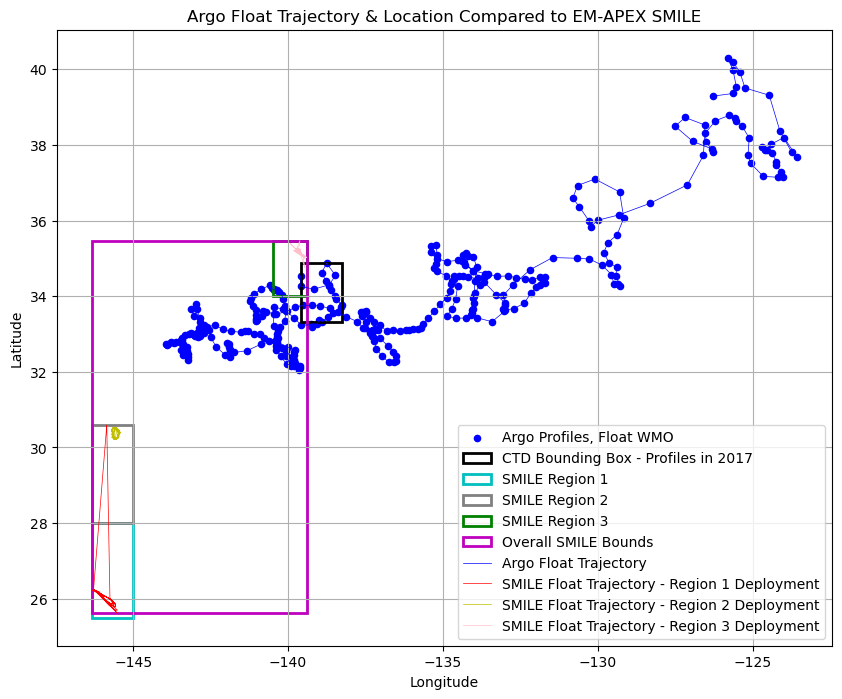

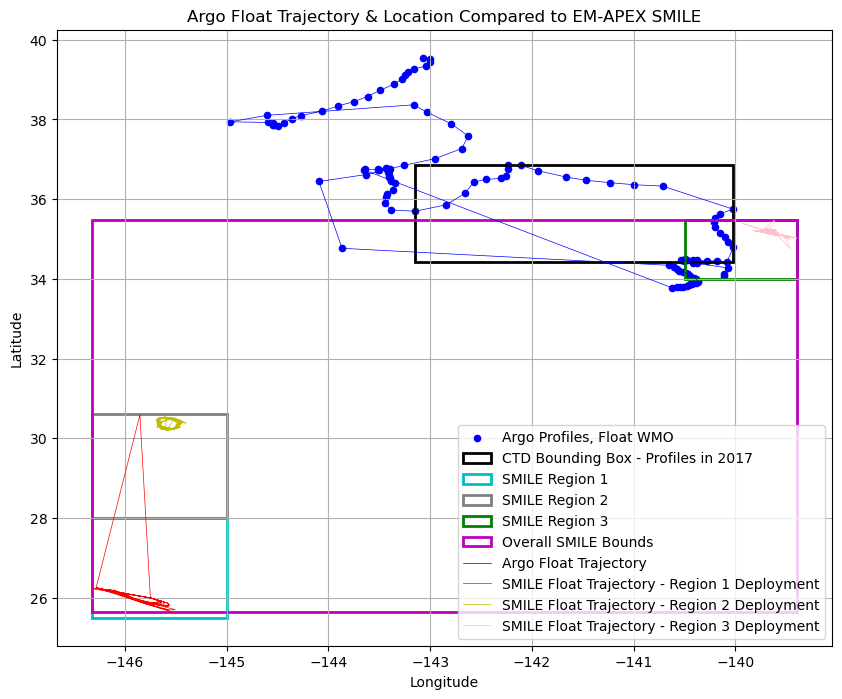

In [13]:
#Region #2

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from argopy import OceanOPSDeployments
from argopy import DataFetcher as ArgoDataFetcher

argo_loader = ArgoDataFetcher(src='erddap', parallel=True) # This limits the data to the highest quality control flag (QC = 1)

sliced_data_dict = {}
a_values = [4900816, 4902251] #This was the only part changed from the code above to represent floats in Region 2.

for a in a_values:
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-01-01','2017-12-31'))
    sliced_data_dict[a] = sliced_data

    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot for Argo Floats
    ax.scatter(df.longitude, df.latitude, s=20, c='b', marker='o', label='Argo Profiles, Float WMO')

    # Get the max and min latitudes and longitudes from the CTD bounds
    max_lat_1 = sliced_data.LATITUDE.max().values
    min_lat_1 = sliced_data.LATITUDE.min().values
    max_lon_1 = sliced_data.LONGITUDE.max().values
    min_lon_1 = sliced_data.LONGITUDE.min().values

    # Add bounding box to the map
    rect1 = patches.Rectangle((min_lon_1, min_lat_1), max_lon_1 - min_lon_1, max_lat_1 - min_lat_1,
                              linewidth=2, edgecolor='k', facecolor='none', label='CTD Bounding Box - Profiles in 2017')
    ax.add_patch(rect1)

    # Get the max and min latitudes and longitudes from the CTD bounds
    max_lat_2 = 28.0
    min_lat_2 = 25.5
    max_lon_2 = -145
    min_lon_2 = -146.322

    rect2 = patches.Rectangle((min_lon_2, min_lat_2), max_lon_2 - min_lon_2, max_lat_2 - min_lat_2,
                              linewidth=2, edgecolor='c', facecolor='none', label='SMILE Region 1')

    # Add another rectangular bounding box
    
    ax.add_patch(rect2)

    # Get the max and min latitudes and longitudes from the CTD bounds
    max_lat_5 = 30.6
    min_lat_5 = 28.0
    max_lon_5 = -145
    min_lon_5 = -146.322

    rect5 = patches.Rectangle((min_lon_5, min_lat_5), max_lon_5 - min_lon_5, max_lat_5 - min_lat_5,
                              linewidth=2, edgecolor='gray', facecolor='none', label='SMILE Region 2')

    # Add another rectangular bounding box
    
    ax.add_patch(rect5)

    #Get the max and min latitudes and longitudes from my own bounds of Region #1
    max_lat_3 = 35.469333
    min_lat_3 = 34.0
    max_lon_3 = -139.39713
    min_lon_3 = -140.5
    
    rect3 = patches.Rectangle((min_lon_3, min_lat_3), max_lon_3 - min_lon_3, max_lat_3 - min_lat_3,
                             linewidth=2, edgecolor='g', facecolor='none', label='SMILE Region 3')

    ax.add_patch(rect3)

    #Get the max and min latitudes and longitudes from Emilio's SMILE bounds!
    max_lat_4 = 35.469333
    min_lat_4 = 25.633673
    max_lon_4 = -139.39713
    min_lon_4 = -146.321753
    
    rect4 = patches.Rectangle((min_lon_4, min_lat_4), max_lon_4 - min_lon_4, max_lat_4 - min_lat_4,
                             linewidth=2, edgecolor='m', facecolor='none', label=("Overall SMILE Bounds"))

    ax.add_patch(rect4)

    #Connect the dots with a line, because the data is already in timely order, if it was NOT we would have to use different code than this!
    ax.plot(df.longitude, df.latitude, c='b', linestyle='-', linewidth=.5, label='Argo Float Trajectory')
    ax.plot(EM_SMILEGPS1_df.LON, EM_SMILEGPS1_df.LAT, c='r', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 1 Deployment')
    ax.plot(EM_SMILEGPS2_df.LON, EM_SMILEGPS2_df.LAT, c='y', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 2 Deployment')
    ax.plot(EM_SMILEGPS3_df.LON, EM_SMILEGPS3_df.LAT, c='pink', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 3 Deployment')

    ax.set_title(f'Argo Float Trajectory & Location Compared to EM-APEX SMILE')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.legend()

    ax.grid()

    plt.show()  # Show the map and bounding box for each 'a' value

    #fig_filename = f'Trajectory5903608.png'  # Use a unique identifier (e.g., index 'i') in the filename
    #fig.savefig(fig_filename)

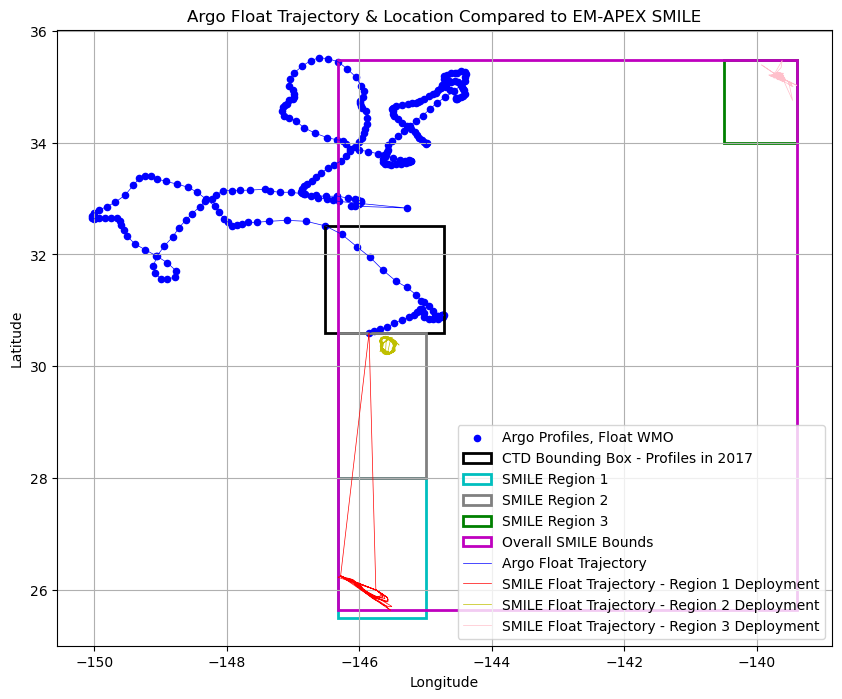

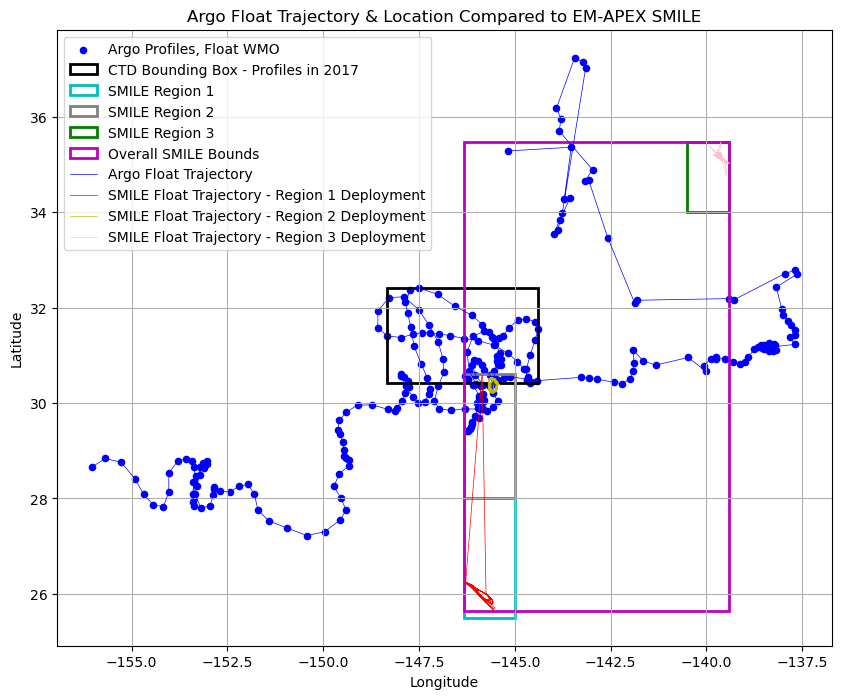

In [14]:
#Region #3

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from argopy import OceanOPSDeployments
from argopy import DataFetcher as ArgoDataFetcher

argo_loader = ArgoDataFetcher(src='erddap', parallel=True) # This limits the data to the highest quality control flag (QC = 1)

sliced_data_dict = {}
a_values = [5904128, 4902149] #These number represent the Argo float ID's that I want to graph!

for a in a_values:

    #This uploads the argo float trajectories
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME") #This adds Time into the index so that we can slice the dataset; before Argo data in the point2profile has two indexes, N_levels and N_Prof (for profiles) that make it difficult to slice otherwise.
    sliced_data = data2.sel(TIME=slice('2017-01-01','2017-12-31')) #This limits the profiles in the Argo float to those in 2017, another way to index Argo data!
    sliced_data_dict[a] = sliced_data

    ArgoSet = ArgoDataFetcher(mode='expert').float(a).load()
    df = ArgoSet.index

    df_deployment = OceanOPSDeployments([-90, 0, 0, 90]).to_dataframe()

    fig, ax = plt.subplots(figsize=(10, 8))

    # Scatter plot for Argo Floats 0 this is what is mapping each profile of the Argo floats, without the time restriction
    ax.scatter(df.longitude, df.latitude, s=20, c='b', marker='o', label='Argo Profiles, Float WMO')

    # Get the max and min latitudes and longitudes from the CTD bounds of the Argo floats that are in 2017 (i.e. with the time restriction)
    max_lat_1 = sliced_data.LATITUDE.max().values
    min_lat_1 = sliced_data.LATITUDE.min().values
    max_lon_1 = sliced_data.LONGITUDE.max().values
    min_lon_1 = sliced_data.LONGITUDE.min().values

    # Add bounding box to the map
    rect1 = patches.Rectangle((min_lon_1, min_lat_1), max_lon_1 - min_lon_1, max_lat_1 - min_lat_1,
                              linewidth=2, edgecolor='k', facecolor='none', label='CTD Bounding Box - Profiles in 2017')
    ax.add_patch(rect1)

    # Get the max and min latitudes and longitudes from the CTD bounds of Region 1 of EM-APEX SMILE - I manually chose these based on playing around with different values using this same graph.
    max_lat_2 = 28.0
    min_lat_2 = 25.5
    max_lon_2 = -145
    min_lon_2 = -146.322

    rect2 = patches.Rectangle((min_lon_2, min_lat_2), max_lon_2 - min_lon_2, max_lat_2 - min_lat_2,
                              linewidth=2, edgecolor='c', facecolor='none', label='SMILE Region 1')

    # Add another rectangular bounding box
    
    ax.add_patch(rect2)

    # Get the max and min latitudes and longitudes from the CTD bounds for Region 2 of EM-APEX SMILE - Again, I manually chose these.
    max_lat_5 = 30.6
    min_lat_5 = 28.0
    max_lon_5 = -145
    min_lon_5 = -146.322

    rect5 = patches.Rectangle((min_lon_5, min_lat_5), max_lon_5 - min_lon_5, max_lat_5 - min_lat_5,
                              linewidth=2, edgecolor='gray', facecolor='none', label='SMILE Region 2')

    # Add another rectangular bounding box
    
    ax.add_patch(rect5)

    #Get the max and min latitudes and longitudes from my own bounds of Region 3 of EM-APEX SMILE - Again, I manually chose these.
    max_lat_3 = 35.469333
    min_lat_3 = 34.0
    max_lon_3 = -139.39713
    min_lon_3 = -140.5
    
    rect3 = patches.Rectangle((min_lon_3, min_lat_3), max_lon_3 - min_lon_3, max_lat_3 - min_lat_3,
                             linewidth=2, edgecolor='g', facecolor='none', label='SMILE Region 3')

    ax.add_patch(rect3)

    #Get the max and min latitudes and longitudes from Emilio's SMILE bounds!
    max_lat_4 = 35.469333
    min_lat_4 = 25.633673
    max_lon_4 = -139.39713
    min_lon_4 = -146.321753
    
    rect4 = patches.Rectangle((min_lon_4, min_lat_4), max_lon_4 - min_lon_4, max_lat_4 - min_lat_4,
                             linewidth=2, edgecolor='m', facecolor='none', label=("Overall SMILE Bounds"))

    ax.add_patch(rect4)

    #Connect the dots that represent EM-APEX SMILE profiles with a line, because the data is already in timely order, for EM-APEX trajectories. If the data was NOT in timely order we would have to use different code than this!
    ax.plot(df.longitude, df.latitude, c='b', linestyle='-', linewidth=.5, label='Argo Float Trajectory')
    ax.plot(EM_SMILEGPS1_df.LON, EM_SMILEGPS1_df.LAT, c='r', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 1 Deployment')
    ax.plot(EM_SMILEGPS2_df.LON, EM_SMILEGPS2_df.LAT, c='y', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 2 Deployment')
    ax.plot(EM_SMILEGPS3_df.LON, EM_SMILEGPS3_df.LAT, c='pink', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 3 Deployment')

    ax.set_title(f'Argo Float Trajectory & Location Compared to EM-APEX SMILE')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    ax.legend()

    ax.grid()

    plt.show()  # Show the map and bounding box for each 'a' value

    #This code commented out may be useful to you later on; it basically turns our figures into their own seperate image files!
    #fig_filename = f'Trajectory5903608.png'  # Use a unique identifier (e.g., index 'i') in the filename
    #fig.savefig(fig_filename)

### Zoom-in of Eddy

This was the last graph I made for the poster and technical paper.

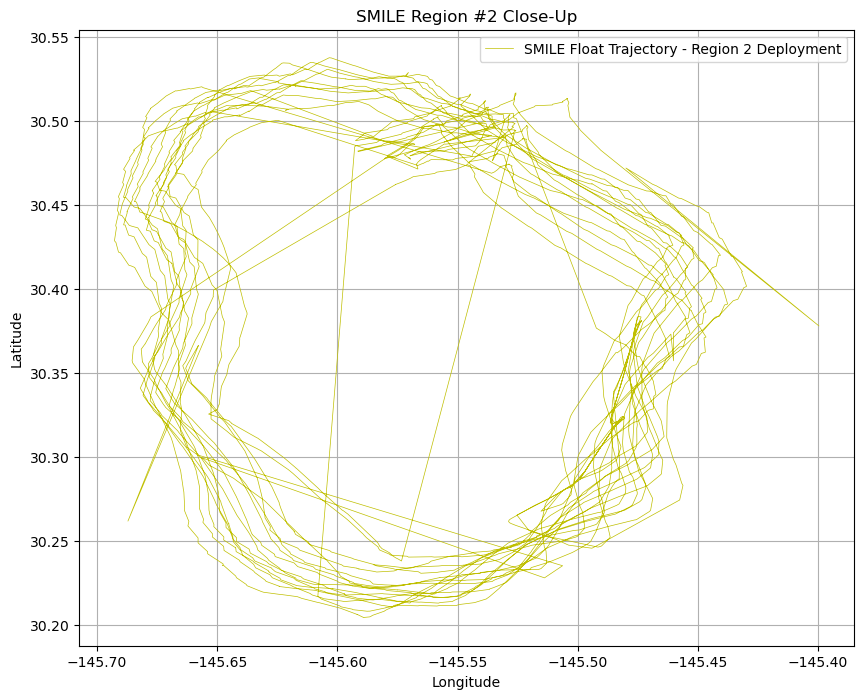

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(EM_SMILEGPS2_df.LON, EM_SMILEGPS2_df.LAT, c='y', linestyle='-', linewidth=.5, label='SMILE Float Trajectory - Region 2 Deployment')

ax.set_title(f'SMILE Region #2 Close-Up')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.legend()

ax.grid()

plt.show()  # Show the map and bounding box for each 'a' value

#fig_filename = f'SMILERegion2.png'  # Use a unique identifier (e.g., index 'i') in the filename
#fig.savefig(fig_filename)